<a href="https://colab.research.google.com/github/niroshank/asp-dotnet-mvc-l10n-app/blob/master/Section_B_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import libraries and dataset
import string
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from google.colab import files
uploaded=files.upload()

Saving spam.csv to spam (1).csv


In [20]:
# Create a dataframe using spam dataset
df = pd.read_csv('spam.csv',  encoding = "ISO-8859-1")

# Drop unwanted columns and rename relvant columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df = df.rename(columns={'v1': 'class','v2': 'text'})
df.head(3)

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f845f272a20>,
      dtype=object)

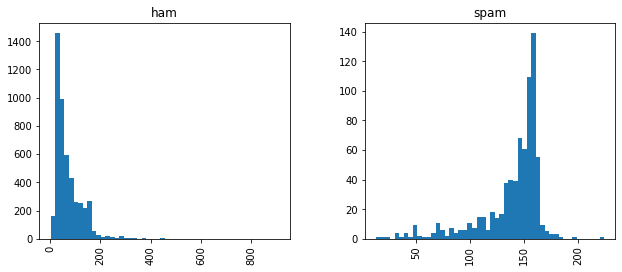

In [39]:
# vizualise the dataset using spam and ham classes. The length of the messages are different in each message type, ham and spam.
df['length'] = df['text'].apply(len)
df.hist(column='length',by='class',bins=50, figsize=(10,4))

**Generate tokinizers**

In [0]:
# Create function to clean the punctuation, stopwords
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [22]:
# Call the text clean function
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
df['text'].apply(process_text).head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
Name: text, dtype: object

**Divide train and test dataset**

In [23]:
# Test dataset 20% and training 80%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.2)
print("train inputs: ",len(X_train))
print("train ouputs: ",len(y_train))
print("test inputs: ",len(X_test))
print("test outputs: ",len(y_test))

train inputs:  4457
train ouputs:  4457
test inputs:  1115
test outputs:  1115


**Create model**

In [0]:
model = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)), # converts strings to integers
    ('tfidf',TfidfTransformer()), # converts integers to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

**Fit the model**

In [34]:
# fit the model with traning dataset
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x7f845f906f28>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [35]:
# Test accuracy using test features and targets
model.score(X_test, y_test)

0.9623318385650225

In [36]:
# Test a custom messages that not included in dataset
import numpy as np 

data = np.array(['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005'])
sampleSeries = pd.Series(data)
outputArray = model.predict(sampleSeries)

print("This message is a",outputArray[0].upper())

This message is a SPAM


In [38]:
# Predict whether 0 to 20 test data is a spam or ham
model.predict(X_test[0:20])

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam'], dtype='<U4')